## Train File
- Depending on Nature EDA (Univariant Analysis) with description (Xi)
- Bivariant Analysis   (Xi & Y) 
- MultiVariant Analysis (Corellagram,hitmap)
- Missing Values (Mean,Mode)
- Outlier Treatment
* Variable Creation
- (Income+?? = Total Income)
- Emi = (10% interest rate)
- Balance ( Total Income - EMI)
- Income to Loan Amt Ratio(loan amt/income Ratio) (D.T.I)
- Scaling (Z) (Before Building Model)


Test File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

* So we have to create new columns as
       @ Total income= income + coapplicant income
          but we have to change its unit
        @ Total Income in 1000 = (income+coapplicant income)/1000
       
       EMI=P*r*[(1+r)^n/(1+r)^n-1]     P:Principal Amount  r-rate of interest n number of months 
       
       @ EMI = Loan_amount*r*[(((1+r)**Tenure)/((1+r)**Tenure)-1)]    where r=10/(12*100) interest rate per month
       
       Here we are assuming rate of interest is 10%    Here n=Tenure
       so r=0.0083
       
       @ Balance = Total Income - EMI

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Sex                 601 non-null    object 
 2   Marital_Status      611 non-null    object 
 3   No_Dependents       599 non-null    object 
 4   Education_Status    614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Income              614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Tenure              600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.duplicated().sum()

0

<a id='Replacing_Null_Values'></a>
### Finding Null Values and Replacing 
>If feature type is categorical replacing them with mode and if its numeric replacing with mean value

In [7]:
df.isna().sum()

Loan_ID                0
Sex                   13
Marital_Status         3
No_Dependents         15
Education_Status       0
Self_Employed         32
Income                 0
Coapplicant_Income     0
Loan_Amount           22
Tenure                14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [8]:
df[['Loan_Amount','Tenure']]=df[['Loan_Amount','Tenure',]].fillna(df[['Loan_Amount','Tenure']].mean())

In [9]:
#Fill NaN Values on Categorical Data
df=df.fillna(df.mode().iloc[0])

In [10]:
df.isna().sum()

Loan_ID               0
Sex                   0
Marital_Status        0
No_Dependents         0
Education_Status      0
Self_Employed         0
Income                0
Coapplicant_Income    0
Loan_Amount           0
Tenure                0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Adding New Column

In [11]:
df['TOT_INC']=(df['Income']+df['Coapplicant_Income'])

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
Loan_Amount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Tenure,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
TOT_INC,614.0,7024.705081,6458.663872,1442.0,4166.00,5416.5,7521.75,81000.0


In [13]:
df['Loan_Amount']=df['Loan_Amount']*1000

In [14]:
r=10/(12*100)
r

0.008333333333333333

In [15]:
def E_M_I(P,n,r):
    EMI=(P*r*(((1+r)**n)/(((1+r)**n)-1)))
    return(EMI)

In [16]:
df['EMI']  = df.apply(lambda x: E_M_I(x.Loan_Amount,x.Tenure,r), axis = 1)

In [17]:
df['Balance']=df['TOT_INC']-df['EMI']

In [18]:
df.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,TOT_INC,EMI,Balance
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146412.162162,360.0,1.0,Urban,Y,5849.0,1284.871510,4564.128490
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.000000,360.0,1.0,Rural,N,6091.0,1123.291610,4967.708390
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.000000,360.0,1.0,Urban,Y,3000.0,579.197236,2420.802764
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.000000,360.0,1.0,Urban,Y,4941.0,1053.085884,3887.914116
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.000000,360.0,1.0,Urban,Y,6000.0,1237.375914,4762.624086


In [19]:
df['Balance']=df['Balance'].astype(int)
df['EMI']=df['EMI'].astype(int)

In [20]:
df=df[['Sex','Marital_Status','No_Dependents','Education_Status','Self_Employed','Property_Area','TOT_INC','Loan_Amount','Credit_History','Tenure','EMI','Balance','Loan_Status']]

TOT_INC (Total Income) is sum of Income and Coapplicant's income
* so they are totally dependant 
* hence dropped Icome and Coapplicant Income Columns

In [21]:
df.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance,Loan_Status
0,Male,No,0,Graduate,No,Urban,5849.0,146412.162162,1.0,360.0,1284,4564,Y
1,Male,Yes,1,Graduate,No,Rural,6091.0,128000.000000,1.0,360.0,1123,4967,N
2,Male,Yes,0,Graduate,Yes,Urban,3000.0,66000.000000,1.0,360.0,579,2420,Y
3,Male,Yes,0,Not Graduate,No,Urban,4941.0,120000.000000,1.0,360.0,1053,3887,Y
4,Male,No,0,Graduate,No,Urban,6000.0,141000.000000,1.0,360.0,1237,4762,Y


In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TOT_INC,614.0,7024.705081,6458.663872,1442.0,4166.00,5416.5,7521.75,81000.0
Loan_Amount,614.0,146412.162162,84037.467683,9000.0,100250.00,129000.0,164750.00,700000.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
Tenure,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
EMI,614.0,1342.498371,857.962642,78.0,896.00,1158.0,1515.75,9758.0
Balance,614.0,5681.210098,6015.179044,-2276.0,3161.25,4204.5,6038.00,77840.0


## Converting Categorical Data into Numerical

In [23]:
df['Sex'].value_counts()

Male      502
Female    112
Name: Sex, dtype: int64

In [24]:
df.groupby('Sex')['Loan_Status'].value_counts()


Sex     Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

In [25]:
df['Marital_Status'].value_counts()

Yes    401
No     213
Name: Marital_Status, dtype: int64

In [26]:
df['No_Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: No_Dependents, dtype: int64

In [27]:
df['Education_Status'].value_counts()

Graduate        480
Not Graduate    134
Name: Education_Status, dtype: int64

In [28]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [30]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [31]:
df['Sex'].replace({'Male':1,'Female':0},inplace=True)

df['Marital_Status'].replace({'Yes':1,'No':0},inplace=True)


df['No_Dependents'].replace({'0':0,'1':1,'2':2,'3+':4},inplace=True)


df['Education_Status'].replace({'Graduate':1,'Not Graduate':0},inplace=True)



df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

df['Property_Area'].replace({'Semiurban':2,'Urban':1,'Rural':0},inplace=True)

df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [32]:
df.shape

(614, 13)

# **Visualization**



1    422
0    192
Name: Loan_Status, dtype: int64




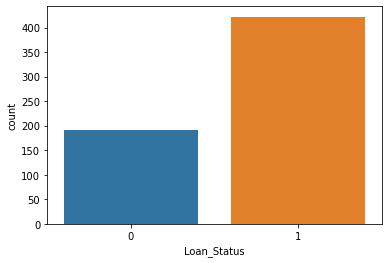

In [33]:
sns.countplot(data=df,x='Loan_Status')
print('\n')
print(df['Loan_Status'].value_counts())
print('\n')

> **68.72%** Loan Applicant's Loan is **Approved**



1    502
0    112
Name: Sex, dtype: int64


Male:1 
 Female:0 
 % Sex
0    66.964286
1    69.123506
Name: Loan_Status, dtype: float64


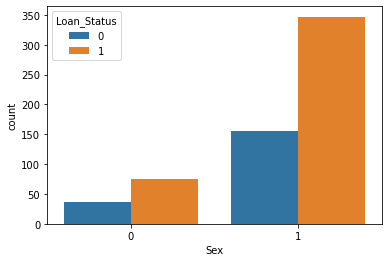

In [34]:
sns.countplot(x='Sex',data=df,hue='Loan_Status')
print('\n')
print(df['Sex'].value_counts())
print('\n')
print("Male:1","\n","Female:0","\n",'%',(df.groupby('Sex')['Loan_Status'].mean())*100)

In [35]:
print('Male applicants',(502/614)*100,'%','\n','Female applicants',(112/614)*100,'%')

Male applicants 81.75895765472313 % 
 Female applicants 18.241042345276874 %


> **81.75%** applicants are **Male**
* out of which **69.12%** Male applicant's Loan is approved

> **18.24%** applicants are **Female**
* out of which **66.96%** female applicants loan is approved

>Male Applicants are more

In [36]:
print((len(df[(df['Sex']==1) & (df['Loan_Status']==1)])/422)*100,'% Male applicants loan is approved')
print('\n')
print((len(df[(df['Sex']==0) & (df['Loan_Status']==1)])/422)*100,'% Female applicants loan is approved')


82.22748815165876 % Male applicants loan is approved


17.77251184834123 % Female applicants loan is approved




1    401
0    213
Name: Marital_Status, dtype: int64



 Yes:1 
 No:0 
 % Marital_Status
0    62.910798
1    71.820449
Name: Loan_Status, dtype: float64


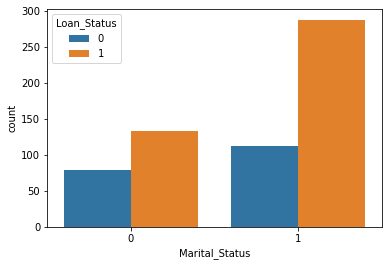

In [37]:

sns.countplot(x='Marital_Status',data=df,hue='Loan_Status')
print('\n')
print(df['Marital_Status'].value_counts())
print('\n')


print('\n','Yes:1','\n','No:0','\n','%',(df.groupby('Marital_Status')['Loan_Status'].mean())*100)

In [38]:
print('Married',(401/614)*100,'%','\n','Not Married',(213/614)*100,'%')

Married 65.30944625407166 % 
 Not Married 34.69055374592834 %


> **65.30%** applicants are **Married**
* out of which **71.82%** Married applicants Loan is approved

> **34.69%** applicants are **Not Married**
* out of which **62.91%** Unmarried applicants loan is approved


In [39]:
print((len(df[(df['Marital_Status']==1) & (df['Loan_Status']==1)])/422)*100,'% Married applicants loan is approved')
print('\n')
print((len(df[(df['Marital_Status']==0) & (df['Loan_Status']==1)])/422)*100,'% Not married applicants loan is approved')


68.24644549763033 % Married applicants loan is approved


31.753554502369667 % Not married applicants loan is approved




1    480
0    134
Name: Education_Status, dtype: int64


 Not Graduate:0 
  Graduate : 1 
 
 % Education_Status
0    61.194030
1    70.833333
Name: Loan_Status, dtype: float64


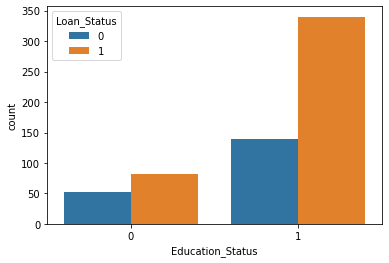

In [40]:
sns.countplot(x='Education_Status',data=df,hue='Loan_Status')
print('\n')
print(df['Education_Status'].value_counts())
print('\n')

print(' Not Graduate:0','\n',' Graduate : 1','\n','\n','%',(df.groupby('Education_Status')['Loan_Status'].mean())*100)

In [41]:
print('Graduates',(480/614)*100,'%','\n','Not Graduate',(134/614)*100,'%')

Graduates 78.17589576547232 % 
 Not Graduate 21.824104234527688 %


> **78.17%** applicants are **Graduate**
* out of which **70.83%** Graduate applicants Loan is approved

> **21.82%** applicants are **Not Graduate**
* out of which **61.19%** Not Graduate applicants loan is approved

>number of graduate loan approved applicant's is more

In [42]:
print((len(df[(df['Education_Status']==1) & (df['Loan_Status']==1)])/422)*100,'% Graduate applicants loan is approved')
print('\n')
print((len(df[(df['Education_Status']==0) & (df['Loan_Status']==1)])/422)*100,'% Not Graduate applicants loan is approved')


80.56872037914692 % Graduate applicants loan is approved


19.431279620853083 % Not Graduate applicants loan is approved




0    532
1     82
Name: Self_Employed, dtype: int64


No:0 
 Yes: 1 
 
 % Self_Employed
0    68.796992
1    68.292683
Name: Loan_Status, dtype: float64


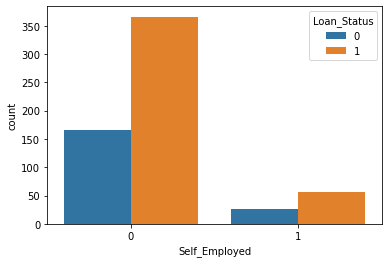

In [43]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
print('\n')
print(df['Self_Employed'].value_counts())
print('\n')

print('No:0','\n','Yes: 1','\n','\n','%',(df.groupby('Self_Employed')['Loan_Status'].mean())*100)



> **86.64%**  applicants are **Not self Employed**
* out of which **68.79%** Not self employed applicant's Loan is approved

> **13.35%** applicants are **Self Employed**
* out of which **68.29%** Self employed applicants loan is approved

>Not Self employed applicants are more

In [44]:
print((len(df[(df['Self_Employed']==0) & (df['Loan_Status']==1)])/422)*100,'% Not Self Employed applicants loan is approved')
print('\n')
print((len(df[(df['Self_Employed']==1) & (df['Loan_Status']==1)])/422)*100,'% Self Employed applicants loan is approved')


86.7298578199052 % Not Self Employed applicants loan is approved


13.270142180094787 % Self Employed applicants loan is approved




0    360
1    102
2    101
4     51
Name: No_Dependents, dtype: int64


% No_Dependents
0    68.611111
1    64.705882
2    75.247525
4    64.705882
Name: Loan_Status, dtype: float64


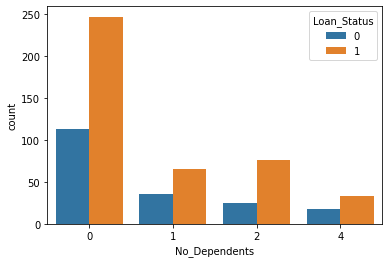

In [45]:
sns.countplot(x='No_Dependents',data=df,hue='Loan_Status')
print('\n')
print(df['No_Dependents'].value_counts())
print('\n')

print('%',(df.groupby('No_Dependents')['Loan_Status'].mean())*100)



In [46]:
print('0',(360/614)*100,'%','\n','1',(102/614)*100,'%','\n','2',(101/614)*100,"%",'\n',"4",(51/614)*100,'%')

0 58.63192182410424 % 
 1 16.612377850162865 % 
 2 16.449511400651463 % 
 4 8.306188925081432 %


> **58.63%** applicants are with **0** dependant
* out of which **68.61%** applicants loan is approved
>**16.61** applicants are with **1** dependant
* out of which **64.70%** applicants loan is approved
>**16.44** applicants are with **2** dependants
* out of which **75.24%** applicants loan is approved
>**8.30%** applicants are with **3+** dependants
* out of which **64.70%** applicants loan is approved
 

In [47]:
print((len(df[(df['No_Dependents']==0) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 0 no of dependents')
print('\n')
print((len(df[(df['No_Dependents']==1) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 1 no of dependents')
print('\n')

print((len(df[(df['No_Dependents']==2) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 2 no of dependents')
print('\n')

print((len(df[(df['No_Dependents']==4) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 3+ no of dependents')


58.53080568720379 % applicants loan is approved with 0 no of dependents


15.639810426540285 % applicants loan is approved with 1 no of dependents


18.009478672985782 % applicants loan is approved with 2 no of dependents


7.819905213270142 % applicants loan is approved with 3+ no of dependents




2    233
1    202
0    179
Name: Property_Area, dtype: int64



 Semiurban:2 
 Urban:1 
 Rural:0 
 % Property_Area
0    61.452514
1    65.841584
2    76.824034
Name: Loan_Status, dtype: float64


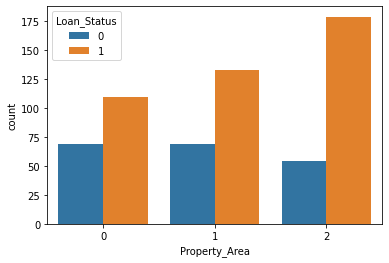

In [48]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
print('\n')
print(df['Property_Area'].value_counts())
print('\n')

print('\n','Semiurban:2','\n','Urban:1','\n','Rural:0','\n','%',(df.groupby('Property_Area')['Loan_Status'].mean())*100)

In [49]:
print('Semiurban',(233/614)*100,'%','\n','Urban',(202/614)*100,'%','\n','Rural',(179/614)*100,'5')

Semiurban 37.94788273615635 % 
 Urban 32.89902280130293 % 
 Rural 29.153094462540718 5


>**37.94%** applicants are from **Semiurban** area
* out of which **76.82%** applicants loan is approved
>**32.89%** applicants are from **Urban** Area
* out of which **65.84%** applicants loan is approved
>**29.15%** applicants are from **Rural** area
* out of which **61.45%** applicants loan is approved

* If applicant is from semiurban area then have 76.82% chances of loan approval  

In [50]:
print((len(df[(df['Property_Area']==2) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved if they are from Semiurban Area')
print('\n')
print((len(df[(df['Property_Area']==1) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved if they are from Urban Area')
print('\n')
print((len(df[(df['Property_Area']==0) & (df['Loan_Status']==1)])/422)*100,'% Not Graduate applicants loan is approved if they are from Rural Area')


42.41706161137441 % applicants loan is approved if they are from Semiurban Area


31.516587677725116 % applicants loan is approved if they are from Urban Area


26.066350710900476 % Not Graduate applicants loan is approved if they are from Rural Area




1.0    525
0.0     89
Name: Credit_History, dtype: int64


Credit_History
0.0     7.865169
1.0    79.047619
Name: Loan_Status, dtype: float64


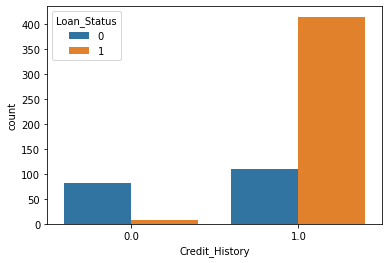

In [51]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')
print('\n')
print(df['Credit_History'].value_counts())
print('\n')

print((df.groupby('Credit_History')['Loan_Status'].mean())*100)

In [52]:
print('Credit history 1  :',(475/614)*100,'%','\n','Credit history 0.842199  :',(50/614)*100,'%','\n','Credit history 0  :',(89/614)*100,'%')

Credit history 1  : 77.36156351791531 % 
 Credit history 0.842199  : 8.143322475570033 % 
 Credit history 0  : 14.495114006514658 %


>**77.36%** applicants are with **1 Credit History**
* out of which **79.57%** applicants loan is approved
>**8.14%** applicants are with **0.842199 Credit History**
* out of which **74%** applicants loan is approved
>**14.49%** applicants are with **0 Credit History**
* out of which only **7.86%** applicants loan is approved
>Applicant with 0 Credit history have approx 92% chances of rejection

In [53]:
print((len(df[(df['Credit_History']==1.000000) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved when credit history is 1')
print('\n')
print((len(df[(df['Credit_History']==0.000000) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved when credit history is 0')
print('\n')
print('8.7 % applicants loan is approved when credit history is 0.842199')


98.34123222748815 % applicants loan is approved when credit history is 1


1.6587677725118484 % applicants loan is approved when credit history is 0


8.7 % applicants loan is approved when credit history is 0.842199


In [54]:
df['Tenure'].value_counts()


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Tenure, dtype: int64

In [55]:
512/614

0.8338762214983714

* 83.38% applicants have applied loan for duration 360 month

In [56]:
df.columns

Index(['Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Property_Area', 'TOT_INC', 'Loan_Amount',
       'Credit_History', 'Tenure', 'EMI', 'Balance', 'Loan_Status'],
      dtype='object')

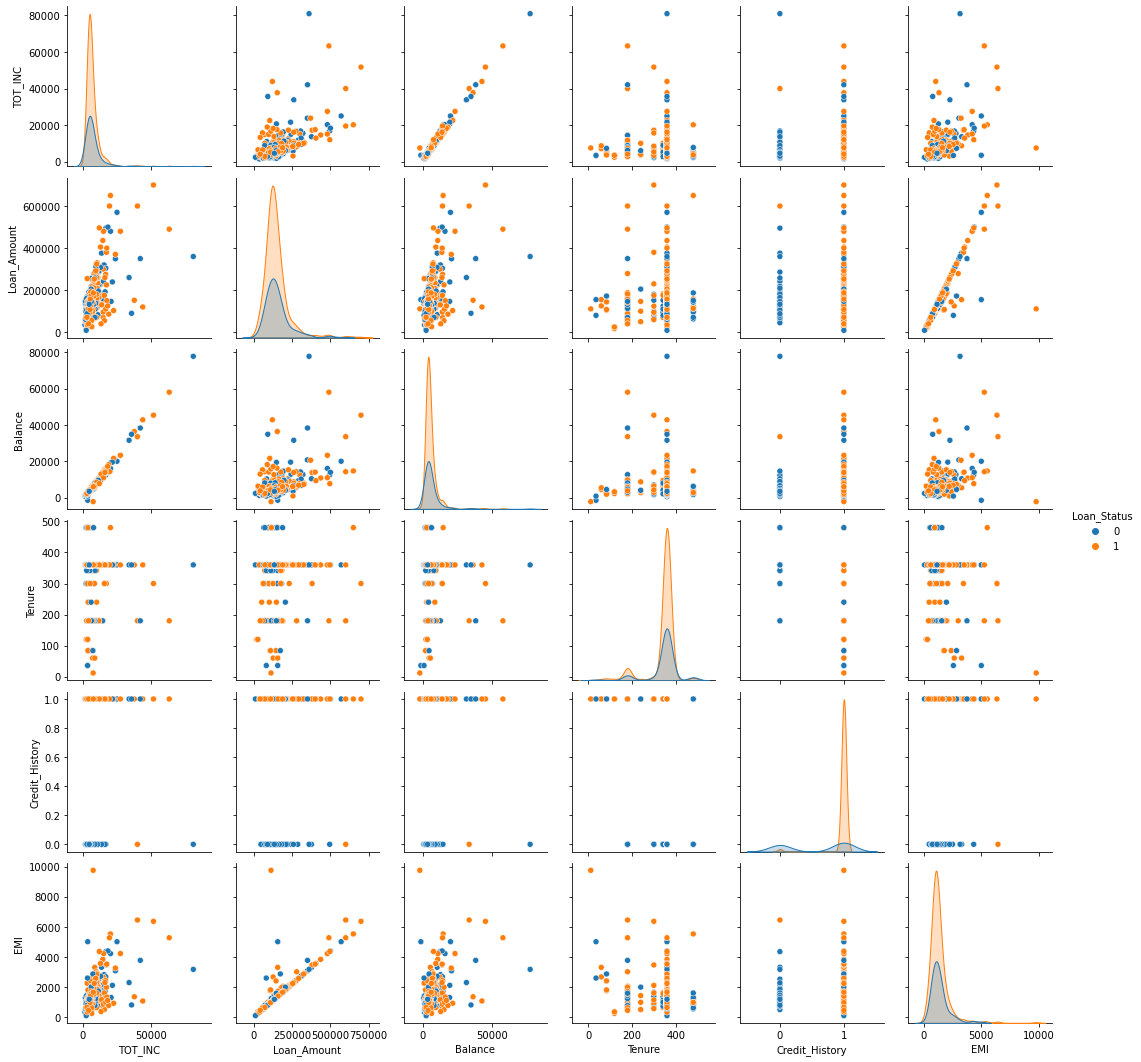

In [57]:
sns.pairplot(df[['TOT_INC', 'Loan_Amount','Balance','Loan_Status','Tenure', 'Credit_History', 'EMI']],hue='Loan_Status')

<AxesSubplot:>

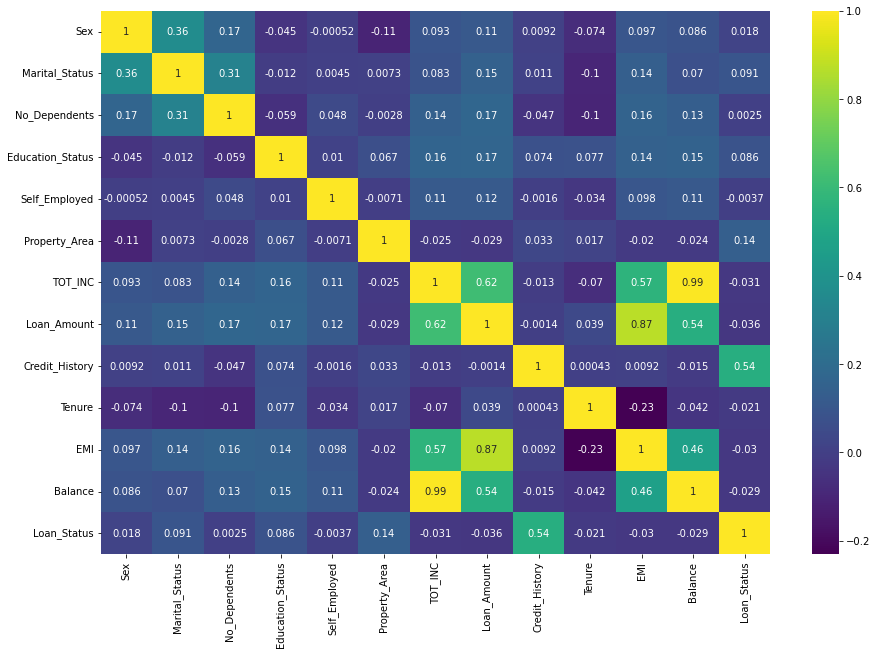

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [59]:
df.isna().sum()

Sex                 0
Marital_Status      0
No_Dependents       0
Education_Status    0
Self_Employed       0
Property_Area       0
TOT_INC             0
Loan_Amount         0
Credit_History      0
Tenure              0
EMI                 0
Balance             0
Loan_Status         0
dtype: int64

## Train Test Split With ML

In [60]:
x= df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y,random_state=101)   # splitting data 80% for train and 20% test

In [63]:
print('X_train shape: ',X_train.shape)
print('\n')
print('y_train shape: ',y_train.shape)
print('\n')
print('X_test shape: ',X_test.shape)
print('\n')

print('y_test shape: ',y_test.shape)

X_train shape:  (491, 12)


y_train shape:  (491,)


X_test shape:  (123, 12)


y_test shape:  (123,)


In [64]:
from sklearn.linear_model import LogisticRegression
Logit1= LogisticRegression()
Logit1.fit(X_train,y_train)

y_hat1 = Logit1.predict_proba(X_test )
y_hat1[:, 1]  # probability for only positive outcome

array([0.69078418, 0.68518276, 0.67906324, 0.68226269, 0.68992868,
       0.62233378, 0.69446958, 0.6832106 , 0.73967868, 0.68912217,
       0.6868127 , 0.69173297, 0.69939895, 0.69638999, 0.64603743,
       0.62893366, 0.68678828, 0.68589113, 0.68954285, 0.68204422,
       0.6875492 , 0.6836369 , 0.74582897, 0.71233976, 0.6836576 ,
       0.68610195, 0.66346693, 0.69223251, 0.69186906, 0.6871424 ,
       0.68769529, 0.69056497, 0.68822196, 0.68605217, 0.68081107,
       0.69283351, 0.68770952, 0.68615892, 0.68410584, 0.69338651,
       0.68244775, 0.68650186, 0.68520487, 0.62672827, 0.68791495,
       0.67772999, 0.69382717, 0.68167803, 0.68515594, 0.68311436,
       0.68577854, 0.68576629, 0.65415707, 0.69573925, 0.68560826,
       0.66703098, 0.69592807, 0.68875511, 0.68956698, 0.68709328,
       0.73356721, 0.68726756, 0.68669651, 0.67925081, 0.67946484,
       0.68996586, 0.65980259, 0.68579622, 0.68319803, 0.68711633,
       0.6737763 , 0.6812965 , 0.68432106, 0.61436145, 0.69019

In [65]:
Logit1.fit(X_train,y_train)

LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score
y_pred_Logit1=Logit1.predict(X_test)
Testing_data_Accuracy=accuracy_score(y_test,y_pred_Logit1)
print('Accuracy on Testing data:',Testing_data_Accuracy)

Accuracy on Testing data: 0.6910569105691057


## With Hyperparameters

In [67]:
from sklearn.model_selection import GridSearchCV

grid_model1= GridSearchCV(Logit1,param_grid={'C':np.logspace(0,10),'penalty':['l1','l2'],'solver':['lbfgs','saga','newton-cg']},return_train_score=True,
)

In [68]:
grid_model1.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+00,
       6.55128557e+00, 1.04811313e+01, 1.67683294e+01, 2.68269580e+01,
       4.29193426e+01, 6.86648845e+01, 1.09854114e+02, 1.75751062e+02,
       2.81176870e+02, 4.49843267e+02, 7.19685673e+02, 1.15139540e+03,
       1.84206997e+03, 2.94705170e+03, 4.71486636e+0...
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             return_train_score=True)

In [69]:
grid_model1.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [70]:
Logit1_grid=LogisticRegression(C=1,penalty='l2',solver='newton-cg')

In [71]:
Logit1_grid

LogisticRegression(C=1, solver='newton-cg')

In [72]:
Logit1_grid.fit(X_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [73]:
y_pred_Logit1_grid=Logit1_grid.predict(X_test)
a=accuracy_score(y_test,y_pred_Logit1_grid)
print('Accuracy_Score On Y',a)

Accuracy_Score On Y 0.8211382113821138


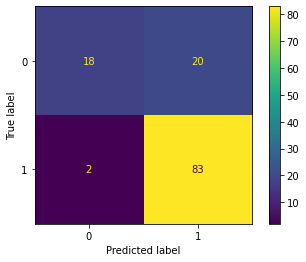

In [74]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_Logit1_grid)
plot_confusion_matrix(Logit1_grid,X_test,y_test)

In [75]:
print(classification_report(y_test,y_pred_Logit1_grid))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



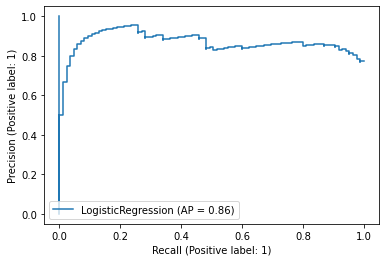

In [76]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(Logit1_grid,X_test,y_test)

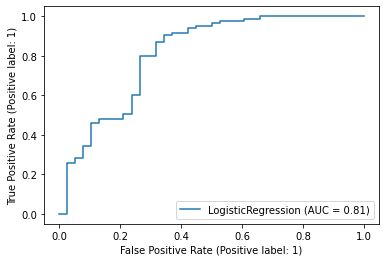

In [77]:
plot_roc_curve(Logit1_grid,X_test,y_test)

<a id='Train_Test_Splitting_and_scalling'></a>


## Train Test Splitting and scalling

In [78]:
x= df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)

In [80]:
# Splitting Data into Train Test
# Train 80%
# Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=101)   


In [81]:
print('X_train shape: ',X_train.shape)
print('\n')
print('y_train shape: ',y_train.shape)
print('\n')
print('X_test shape: ',X_test.shape)
print('\n')

print('y_test shape: ',y_test.shape)


X_train shape:  (491, 12)


y_train shape:  (491,)


X_test shape:  (123, 12)


y_test shape:  (123,)


<a id='Logistic_Regression'></a>


### Logistic Regression 
<a id='Without_Hyperparameters'></a>

#### without Hyperparameters

In [82]:
from sklearn.linear_model import LogisticRegression
Logit2= LogisticRegression()
Logit2.fit(X_train,y_train)

y_hat1 = Logit2.predict_proba(X_test )
y_hat1[:, 1]  # probability for only positive outcome

array([0.6611958 , 0.72655736, 0.71454461, 0.64801455, 0.83830306,
       0.83958016, 0.07234545, 0.06254925, 0.83870741, 0.81685674,
       0.83509081, 0.75423834, 0.73671779, 0.05209578, 0.82815788,
       0.90635093, 0.82991716, 0.74173325, 0.84913901, 0.87245359,
       0.8295635 , 0.04983443, 0.7806069 , 0.86307529, 0.7429623 ,
       0.84745443, 0.83068938, 0.79169903, 0.73037223, 0.69927245,
       0.87025404, 0.81522182, 0.74787124, 0.87264926, 0.82253911,
       0.78818717, 0.75241433, 0.07012863, 0.79893121, 0.85434055,
       0.81943692, 0.82468158, 0.5881989 , 0.10841643, 0.04839581,
       0.59610269, 0.75298473, 0.70868443, 0.14449481, 0.06116906,
       0.77854674, 0.81118035, 0.82766876, 0.64857549, 0.59434986,
       0.61809555, 0.73675353, 0.8645953 , 0.73809252, 0.87172281,
       0.69231694, 0.87755277, 0.64403592, 0.81929929, 0.85421401,
       0.8261299 , 0.08339585, 0.87235965, 0.75456038, 0.67699084,
       0.83232786, 0.81788779, 0.828813  , 0.89240054, 0.74520

In [83]:
Logit2.fit(X_train,y_train)

LogisticRegression()

In [84]:
from sklearn.metrics import accuracy_score
y_pred_Logit2=Logit2.predict(X_test)
Testing_data_Accuracy=accuracy_score(y_test,y_pred_Logit2)
print('Accuracy on Testing data:',Testing_data_Accuracy)

Accuracy on Testing data: 0.8211382113821138


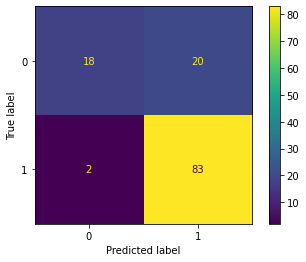

In [85]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_Logit2)
plot_confusion_matrix(Logit2,X_test,y_test)

In [86]:
print(classification_report(y_test,y_pred_Logit2))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



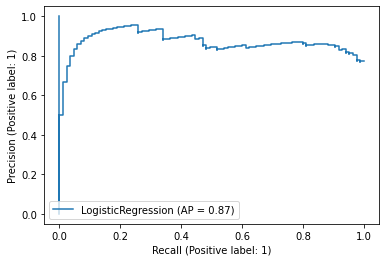

In [87]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(Logit2,X_test,y_test)

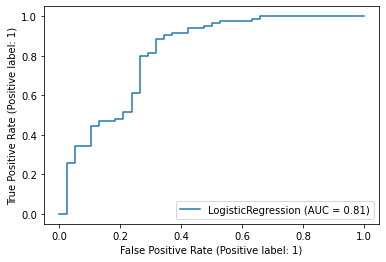

In [88]:
plot_roc_curve(Logit2,X_test,y_test)

<a id='Using_Hyperparameters'></a>

## Logistic regression using hyperparameters

In [89]:
from sklearn.model_selection import GridSearchCV

grid_model2= GridSearchCV(Logit2,param_grid={'C':np.logspace(0,10),'penalty':['l1','l2'],'solver':['lbfgs','saga','newton-cg']},return_train_score=True,
)

In [90]:
grid_model2.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+00,
       6.55128557e+00, 1.04811313e+01, 1.67683294e+01, 2.68269580e+01,
       4.29193426e+01, 6.86648845e+01, 1.09854114e+02, 1.75751062e+02,
       2.81176870e+02, 4.49843267e+02, 7.19685673e+02, 1.15139540e+03,
       1.84206997e+03, 2.94705170e+03, 4.71486636e+0...
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             return_train_score=True)

In [91]:
grid_model2.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

In [92]:
Logit_final=LogisticRegression(C=1.0,penalty='l1',solver='saga')

In [93]:
Logit_final

LogisticRegression(penalty='l1', solver='saga')

In [94]:
Logit_final.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [95]:
y_pred_Logit_final=Logit_final.predict(X_test)
a=accuracy_score(y_test,y_pred_Logit_final)
print('Accuracy_Score On Y',a)

Accuracy_Score On Y 0.8211382113821138


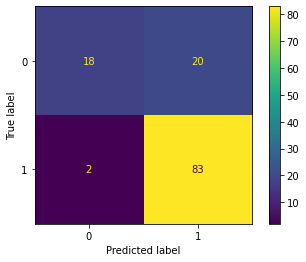

In [96]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_Logit_final)
plot_confusion_matrix(Logit_final,X_test,y_test)

In [97]:
print(classification_report(y_test,y_pred_Logit_final))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



In [98]:
Logit_final.coef_

array([[ 0.00655425,  0.21440755,  0.02887089,  0.09792798,  0.0375682 ,
         0.33537956, -0.08748313,  0.        ,  1.35944957, -0.07381254,
        -0.04488969, -0.02397312]])

In [99]:
Logit_final.intercept_

array([0.77313313])

In [100]:
Logit_final.coef_[0]

array([ 0.00655425,  0.21440755,  0.02887089,  0.09792798,  0.0375682 ,
        0.33537956, -0.08748313,  0.        ,  1.35944957, -0.07381254,
       -0.04488969, -0.02397312])

In [101]:
coefs = pd.Series(index=x.columns,data=Logit_final.coef_[0])
coefs

Sex                 0.006554
Marital_Status      0.214408
No_Dependents       0.028871
Education_Status    0.097928
Self_Employed       0.037568
Property_Area       0.335380
TOT_INC            -0.087483
Loan_Amount         0.000000
Credit_History      1.359450
Tenure             -0.073813
EMI                -0.044890
Balance            -0.023973
dtype: float64

In [102]:
cfs = coefs.sort_values( ascending=False)

In [103]:
cfs

Credit_History      1.359450
Property_Area       0.335380
Marital_Status      0.214408
Education_Status    0.097928
Self_Employed       0.037568
No_Dependents       0.028871
Sex                 0.006554
Loan_Amount         0.000000
Balance            -0.023973
EMI                -0.044890
Tenure             -0.073813
TOT_INC            -0.087483
dtype: float64

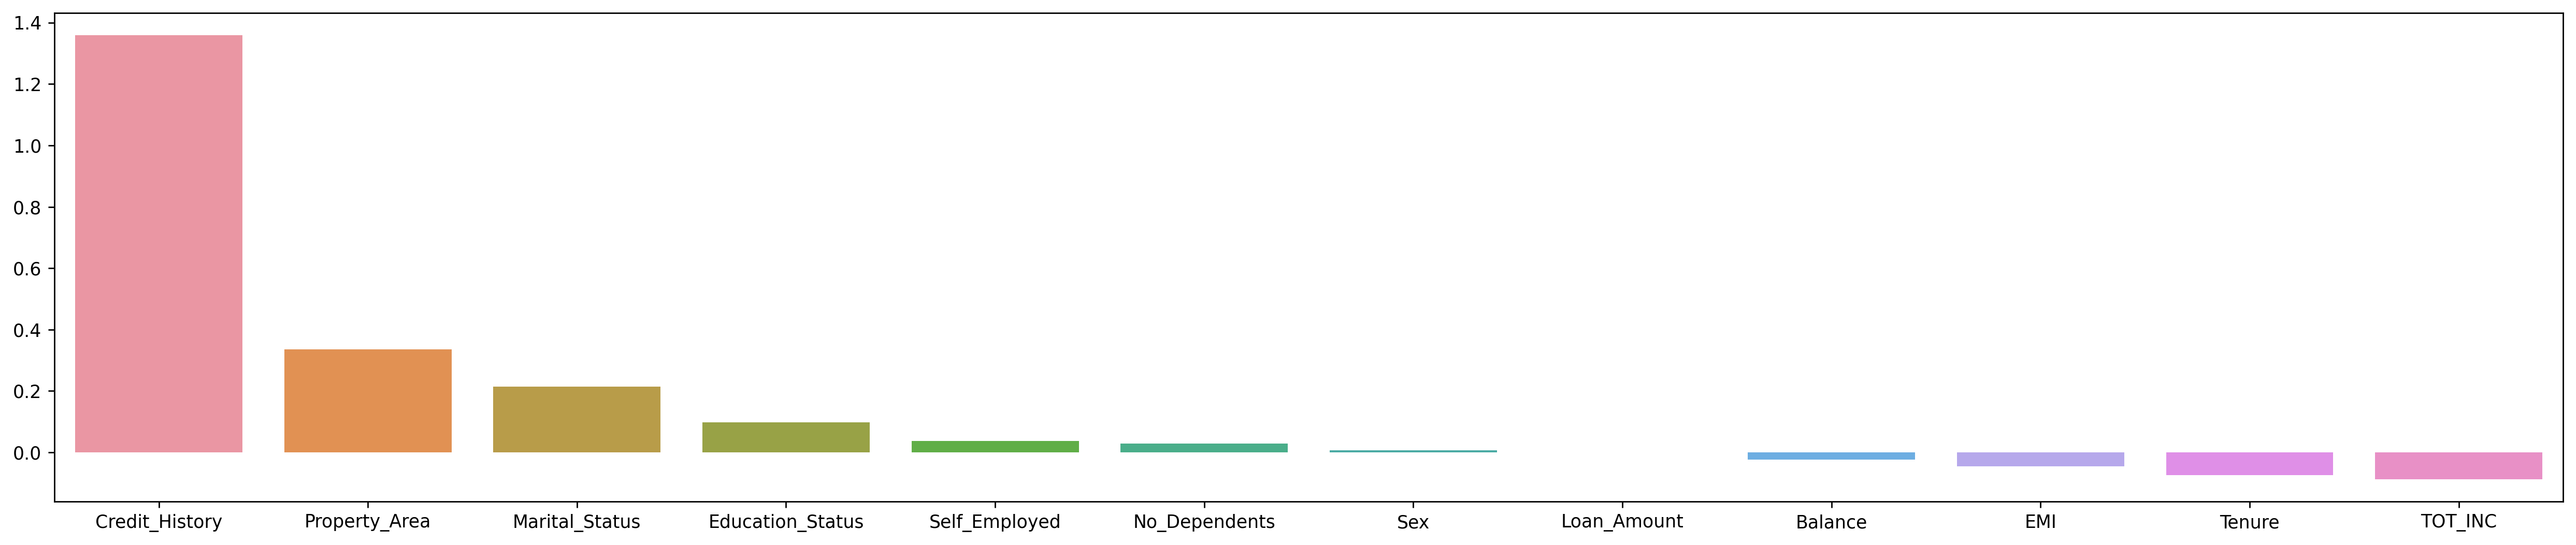

In [104]:
plt.figure(figsize=(25,5),dpi=250)
sns.barplot(x=cfs.index,y=cfs.values);

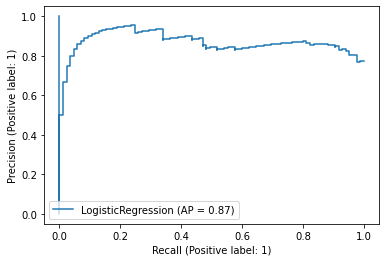

In [105]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(Logit_final,X_test,y_test)

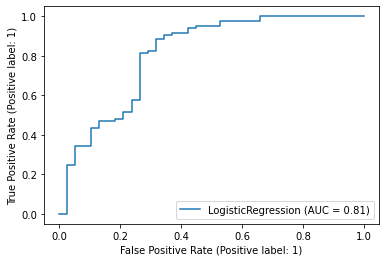

In [106]:
plot_roc_curve(Logit_final,X_test,y_test)

<a id='Decision_Tree_Classifier'></a>

## Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
model_D = DecisionTreeClassifier()
model_D.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred_D= model_D.predict(X_test)

In [109]:
y_pred_D

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

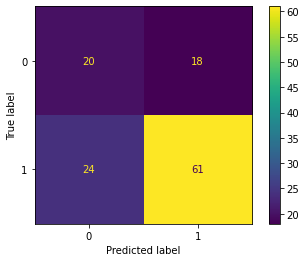

In [110]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_D)
plot_confusion_matrix(model_D,X_test,y_test)

In [111]:

print(classification_report(y_test,y_pred_D))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        38
           1       0.77      0.72      0.74        85

    accuracy                           0.66       123
   macro avg       0.61      0.62      0.62       123
weighted avg       0.67      0.66      0.66       123



In [112]:
model_D.feature_importances_

array([0.00819208, 0.01469862, 0.06185389, 0.01795164, 0.02462841,
       0.02138595, 0.15955718, 0.12442736, 0.28624044, 0.01551619,
       0.09057144, 0.1749768 ])

In [113]:
pd.DataFrame(index=x.columns,data=model_D.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Sex,0.008192
Marital_Status,0.014699
No_Dependents,0.061854
Education_Status,0.017952
Self_Employed,0.024628
Property_Area,0.021386
TOT_INC,0.159557
Loan_Amount,0.124427
Credit_History,0.286240
Tenure,0.015516


* Credit history is more important
* Credit history>Total INC >Balance>Loan amount

In [114]:
from sklearn.tree import plot_tree

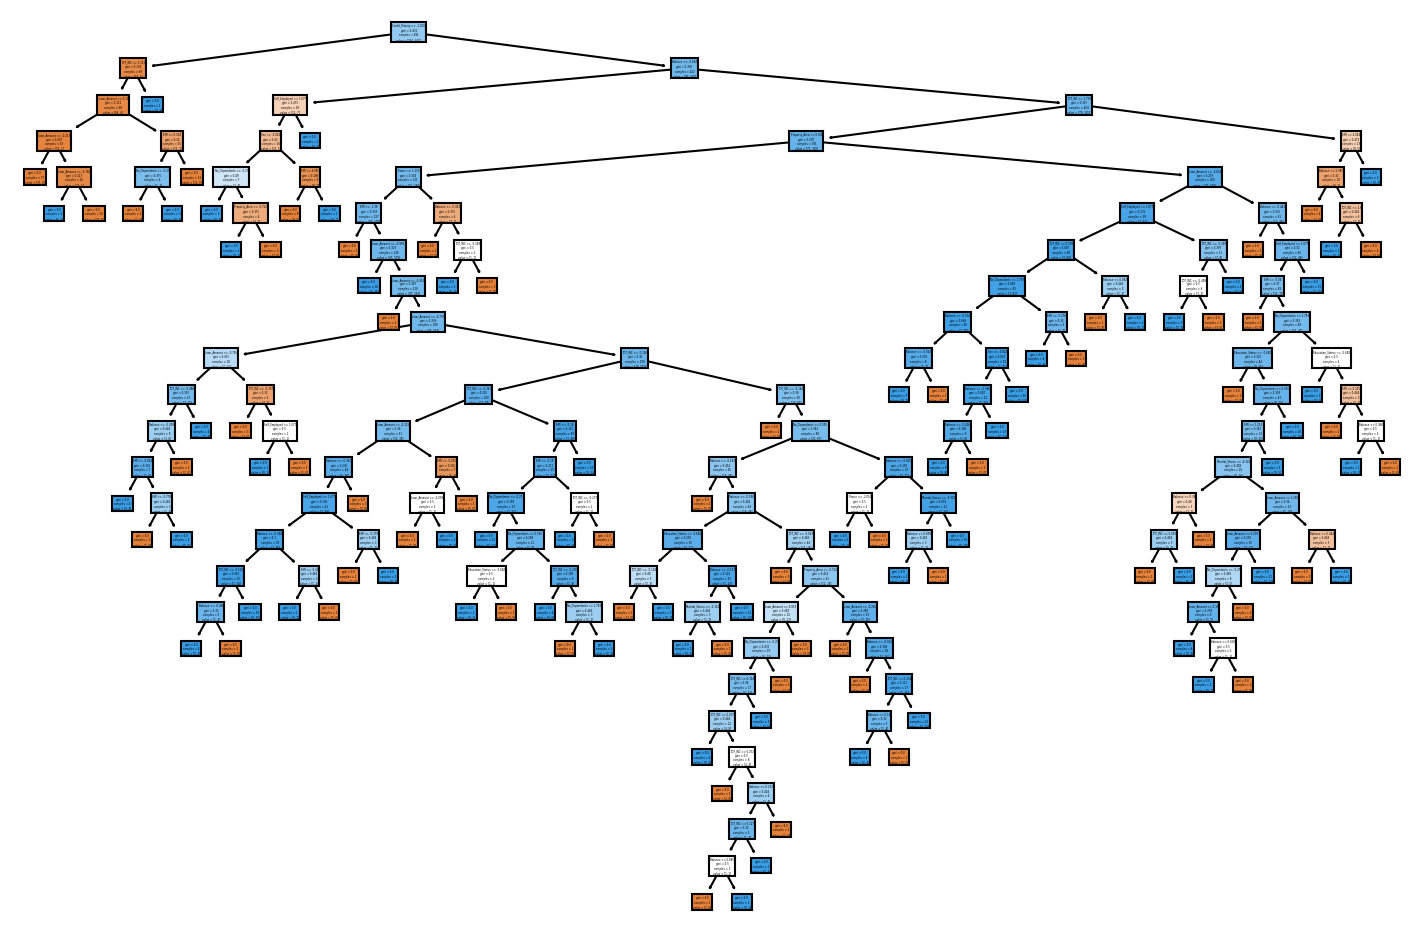

In [115]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model_D,filled=True,feature_names=x.columns);

In [116]:
def report_model(model_D):
    model_preds = model_D.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model_D,filled=True,feature_names=x.columns);

In [117]:
# max_depth
pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.68      0.50      0.58        38
           1       0.80      0.89      0.84        85

    accuracy                           0.77       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.76      0.77      0.76       123





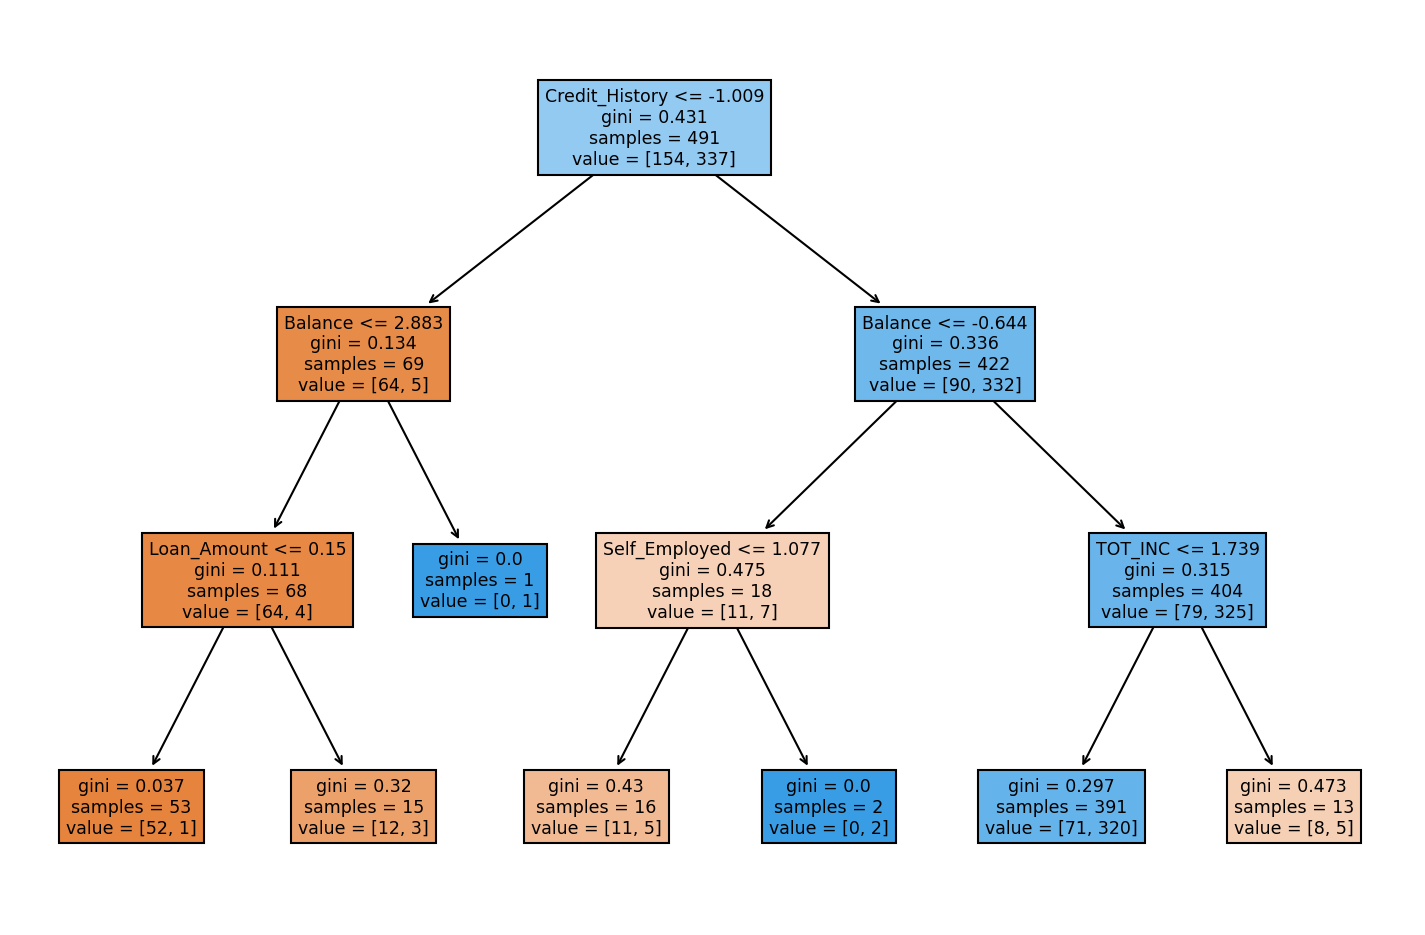

In [118]:
report_model(pruned_tree)

In [119]:
#max Leaf nodes
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        38
           1       0.81      0.95      0.88        85

    accuracy                           0.81       123
   macro avg       0.82      0.73      0.75       123
weighted avg       0.81      0.81      0.80       123





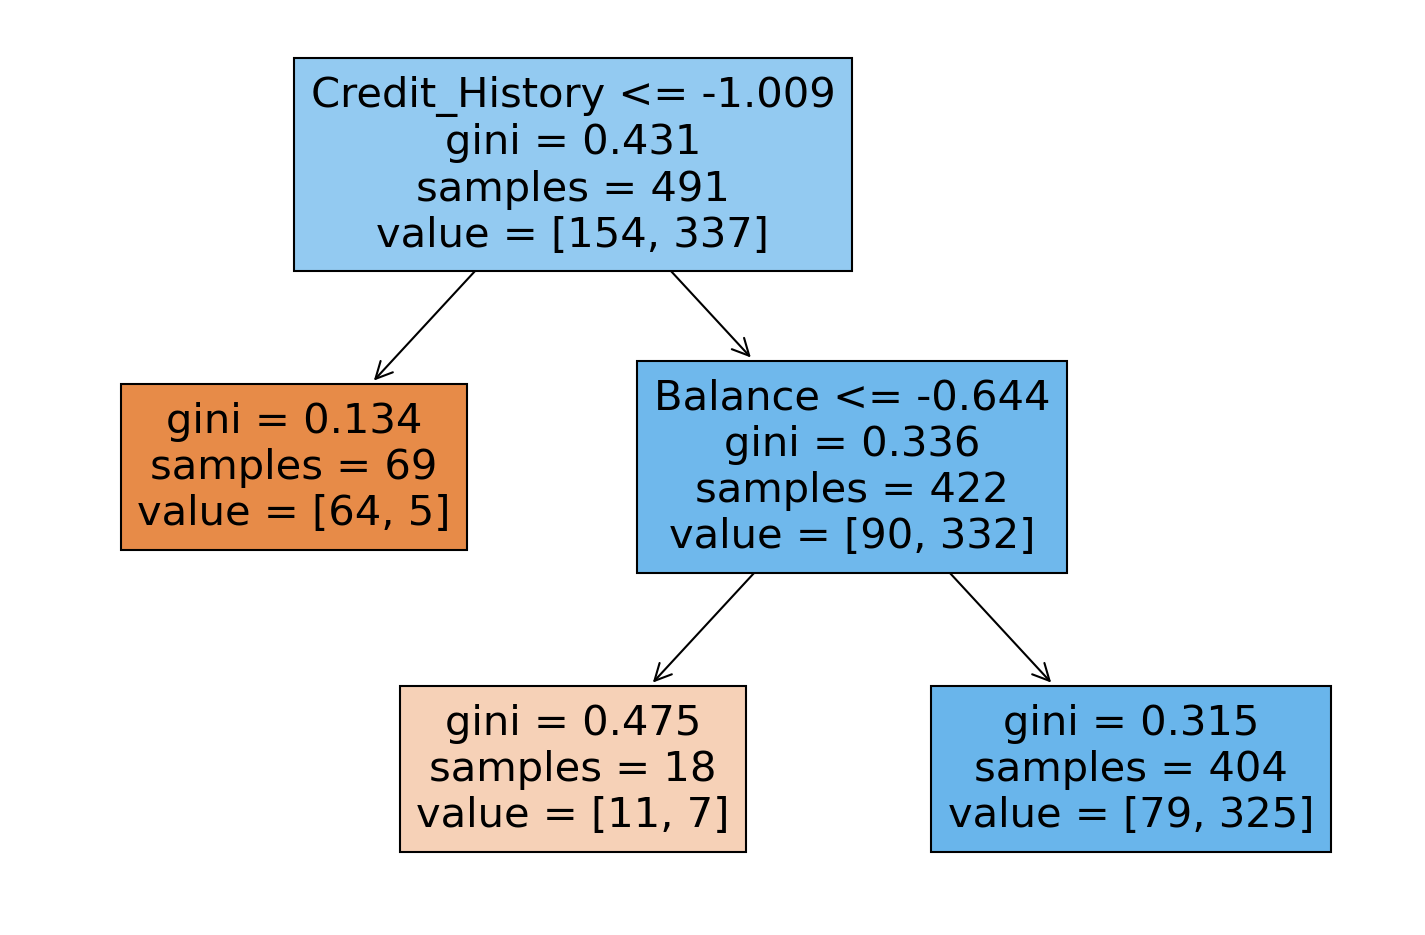

In [120]:
report_model(pruned_tree)

In [121]:
#Criterion
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.45      0.55      0.49        38
           1       0.78      0.69      0.73        85

    accuracy                           0.65       123
   macro avg       0.61      0.62      0.61       123
weighted avg       0.67      0.65      0.66       123





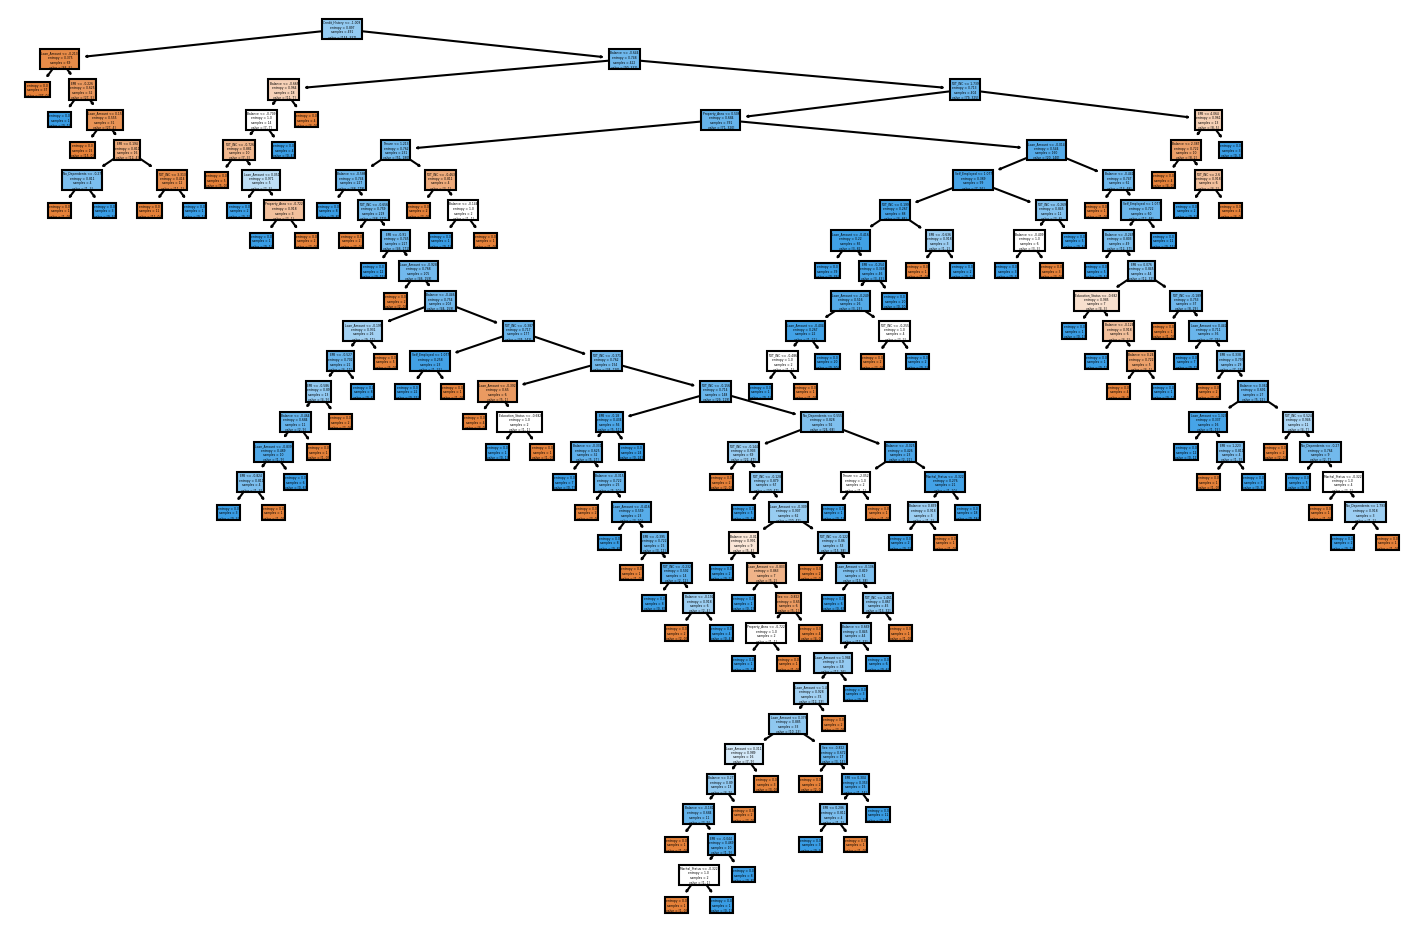

In [122]:
report_model(entropy_tree)

<a id='using_hyperparameters'></a>

### using HyperParameters

In [123]:

grid_model_D= GridSearchCV(model_D,param_grid={'criterion':['gini','entropy'],'max_depth':(2,3),'max_leaf_nodes':(2,3)},return_train_score=True)

In [124]:
grid_model_D.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': (2, 3),
                         'max_leaf_nodes': (2, 3)},
             return_train_score=True)

In [125]:
grid_model_D.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2}

In [126]:
final_model_D=DecisionTreeClassifier(criterion='gini', max_depth= 2,max_leaf_nodes= 2)

In [127]:
final_model_D.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

In [128]:
y_pred_D1 =final_model_D.predict(X_test)

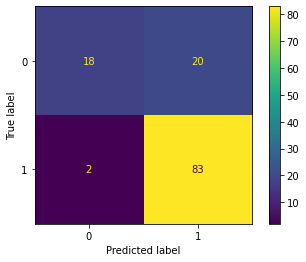

In [129]:
confusion_matrix(y_test,y_pred_D1)
plot_confusion_matrix(final_model_D,X_test,y_test)

In [130]:

print(classification_report(y_test,y_pred_D1))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



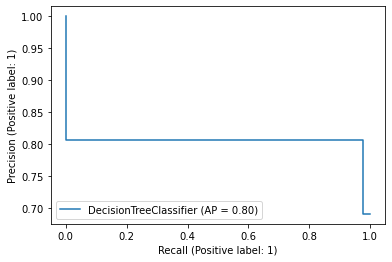

In [131]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(final_model_D,X_test,y_test)

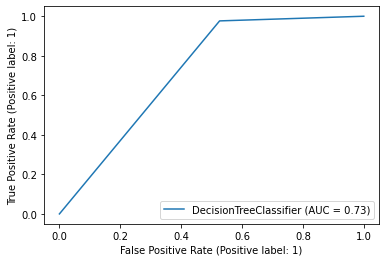

In [132]:
plot_roc_curve(final_model_D,X_test,y_test)

In [133]:
final_model_D.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [134]:
pd.DataFrame(index=x.columns,data=final_model_D.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Sex,0.0
Marital_Status,0.0
No_Dependents,0.0
Education_Status,0.0
Self_Employed,0.0
Property_Area,0.0
TOT_INC,0.0
Loan_Amount,0.0
Credit_History,1.0
Tenure,0.0


* Credit history have all importance and other features are not important

<a id='Random_Forest_Classifier'></a>

# Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
model_R = RandomForestClassifier()
model_R.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
y_pred_R = model_R.predict(X_test)

In [137]:
accuracy_score(y_test,y_pred_R)

0.7886178861788617

In [138]:

confusion_matrix(y_test,y_pred_R)

array([[21, 17],
       [ 9, 76]], dtype=int64)

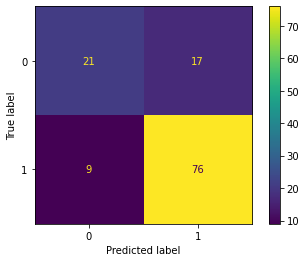

In [139]:
plot_confusion_matrix(model_R,X_test,y_test)

## Using Hyper Parameters

In [140]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model_rndm = RandomForestClassifier(n_estimators=n,max_features='auto')
    model_rndm.fit(X_train,y_train)
    test_preds = model_rndm.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

In [141]:
len(test_error)

39

In [142]:
test_error

[0.29268292682926833,
 0.34959349593495936,
 0.2682926829268293,
 0.3089430894308943,
 0.1869918699186992,
 0.2520325203252033,
 0.2195121951219512,
 0.2520325203252033,
 0.2520325203252033,
 0.26016260162601623,
 0.2520325203252033,
 0.24390243902439024,
 0.22764227642276424,
 0.29268292682926833,
 0.2357723577235772,
 0.2195121951219512,
 0.21138211382113825,
 0.24390243902439024,
 0.21138211382113825,
 0.2195121951219512,
 0.2032520325203252,
 0.24390243902439024,
 0.2195121951219512,
 0.22764227642276424,
 0.21138211382113825,
 0.22764227642276424,
 0.21138211382113825,
 0.22764227642276424,
 0.2195121951219512,
 0.2032520325203252,
 0.2032520325203252,
 0.21138211382113825,
 0.2357723577235772,
 0.2032520325203252,
 0.21138211382113825,
 0.21138211382113825,
 0.1869918699186992,
 0.22764227642276424,
 0.21138211382113825]

In [143]:
min(test_error)

0.1869918699186992

In [144]:
temp=min(test_error)
index = test_error.index(temp)
index

4

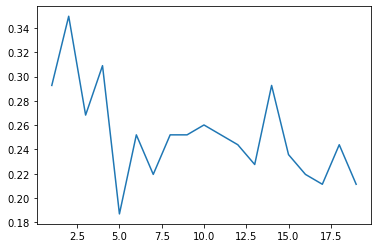

In [145]:
#plt.plot(range(1,100),errors)
plt.plot(range(1,20),test_error[0:19])

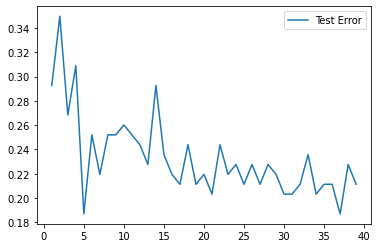

In [146]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [147]:
grid_model_R= GridSearchCV(model_R,param_grid={'n_estimators':[10,15,20],'criterion':['gini','entropy'],'max_features':[2,3,4],'bootstrap':[True,False],'oob_score':[True,False]},return_train_score=True)

In [148]:
grid_model_R.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 15, 20],
                         'oob_score': [True, False]},
             return_train_score=True)

In [149]:
grid_model_R.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 2,
 'n_estimators': 20,
 'oob_score': False}

In [150]:
final_model_R= RandomForestClassifier(bootstrap= True,criterion='gini',max_features=2,n_estimators=15,oob_score= True)
final_model_R.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=15, oob_score=True)

In [151]:
y_pred_R1 = final_model_R.predict(X_test)

In [152]:
accuracy_score(y_test,y_pred_R1)

0.8048780487804879

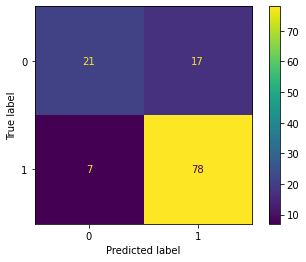

In [153]:
plot_confusion_matrix(final_model_R,X_test,y_test)

In [154]:
print(classification_report(y_test,y_pred_R1))

              precision    recall  f1-score   support

           0       0.75      0.55      0.64        38
           1       0.82      0.92      0.87        85

    accuracy                           0.80       123
   macro avg       0.79      0.74      0.75       123
weighted avg       0.80      0.80      0.80       123



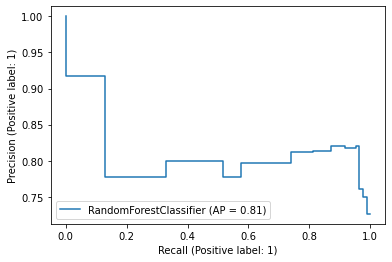

In [155]:
plot_precision_recall_curve(final_model_R,X_test,y_test)

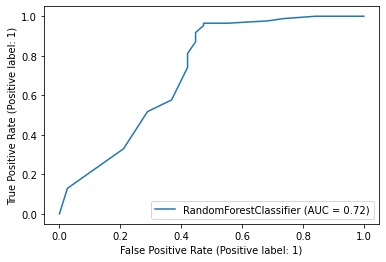

In [156]:
plot_roc_curve(final_model_R,X_test,y_test)

In [157]:
final_model_R.feature_importances_

array([0.01759549, 0.01732318, 0.04257667, 0.01986123, 0.01685016,
       0.04017228, 0.15275434, 0.13200311, 0.24829872, 0.03228911,
       0.13527833, 0.14499739])

In [158]:
coef=pd.DataFrame(index=x.columns,data=final_model_R.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance',ascending=False)
coef

,Feature Importance
Credit_History,0.248299
TOT_INC,0.152754
Balance,0.144997
EMI,0.135278
Loan_Amount,0.132003
No_Dependents,0.042577
Property_Area,0.040172
Tenure,0.032289
Education_Status,0.019861
Sex,0.017595


* Credit history>total income>Balance>EMI>Loan Amount

<a id='KNN_Classifier'></a>

# KNN Classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [160]:
y_pred_knn = knn_model.predict(X_test)
a=accuracy_score(y_test,y_pred_knn)
print('accuracy_on_y is ',a*100,'%')

accuracy_on_y is  78.04878048780488 %


In [161]:
error=1-a
error

0.2195121951219512

In [162]:
confusion_matrix(y_test,y_pred_knn)

array([[18, 20],
       [ 7, 78]], dtype=int64)

In [163]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.80      0.92      0.85        85

    accuracy                           0.78       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



Accuracy score is 0.65 which is very less

## Using Hyperparameters

In [164]:
test_error_rates = []


for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    

In [165]:
len(test_error_rates)

49

In [166]:
test_error_rates

[0.2845528455284553,
 0.31707317073170727,
 0.24390243902439024,
 0.30081300813008127,
 0.2195121951219512,
 0.22764227642276424,
 0.21138211382113825,
 0.2032520325203252,
 0.21138211382113825,
 0.21138211382113825,
 0.19512195121951215,
 0.1869918699186992,
 0.1869918699186992,
 0.1869918699186992,
 0.17886178861788615,
 0.17886178861788615,
 0.17886178861788615,
 0.17886178861788615,
 0.17886178861788615,
 0.17886178861788615,
 0.17886178861788615,
 0.17886178861788615,
 0.1869918699186992,
 0.17886178861788615,
 0.1869918699186992,
 0.1869918699186992,
 0.19512195121951215,
 0.19512195121951215,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.21138211382113825,
 0.2032520325203252,
 0.19512195121951215,
 0.19512195121951215,
 0.19512195121951215,
 0.19512195121951215,
 0.19512195121951215,
 0.2032520325203252,
 0.19512195121951215,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.20325

In [167]:
min(test_error_rates)

0.17886178861788615

In [168]:
temp=min(test_error_rates)
index = test_error_rates.index(temp)
index

14

Text(0.5, 0, 'K Value')

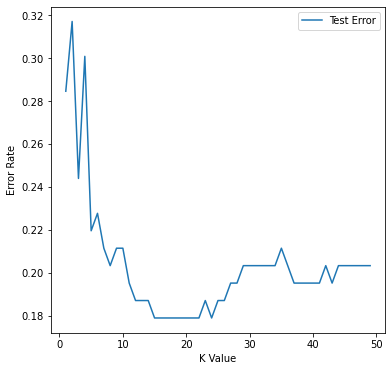

In [169]:


plt.figure(figsize=(6,6))
plt.plot(range(1,50),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [170]:
final_model_knn = KNeighborsClassifier(n_neighbors=19)
final_model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [171]:
y_pred_knn1 =final_model_knn.predict(X_test)
a=accuracy_score(y_test,y_pred_knn1)
print('accuracy_on_y is ',a*100,'%')

accuracy_on_y is  82.11382113821138 %


In [172]:
confusion_matrix(y_test,y_pred_knn1)

array([[18, 20],
       [ 2, 83]], dtype=int64)

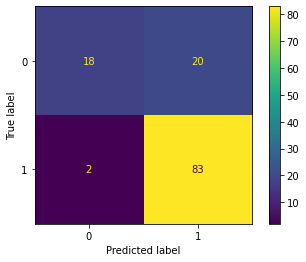

In [173]:
plot_confusion_matrix(final_model_knn,X_test,y_test)

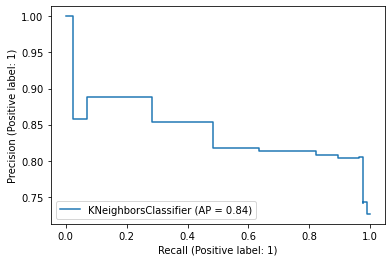

In [174]:
plot_precision_recall_curve(final_model_knn,X_test,y_test)

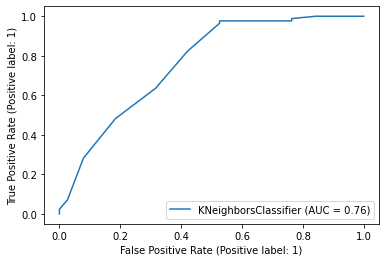

In [175]:
plot_roc_curve(final_model_knn,X_test,y_test)

In [176]:
from sklearn import metrics
Y_proba=final_model_knn.predict_proba(X_test)[::,1]
AUC=metrics.roc_auc_score(y_test,Y_proba)
AUC

0.7628482972136224

* Area under curve is 56%

# Finding Best Classifier

In [177]:


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [178]:
import numpy as np
C=np.logspace(0,10)
Cs=np.logspace(0,10)

In [179]:
#Create Parameters
model_parameters={
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion':['gini','entropy'],'max_depth':(2,3),'max_leaf_nodes':(2,3)
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param': {
            'n_neighbors': [3,7,11,15]
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param': {
            'n_estimators':[5,15,25],'criterion':['gini','entropy'],'max_features':[2,3,4],'bootstrap':[True,False],'oob_score':[True,False]
        }
    },
    'LogisticRegression':{
        'model':LogisticRegression(),
        'param':{
            'C':C,'penalty':['l1','l2'],'solver':['lbfgs','saga','newton-cg']
        }
    }
}

In [180]:
scores=[]
for model_name, np in model_parameters.items():
    model_selection = GridSearchCV(estimator=np['model'],param_grid=np['param'],return_train_score=False)
    model_selection.fit(X_train,y_train)
    y_pred_=model_selection.predict(X_test)
    y_pred_proba=model_selection.predict_proba(X_test)[::,1]
    scores.append({
        'model':model_name,
        'best_score_on_Trainning':model_selection.best_score_,
        'best_params_for_model':model_selection.best_params_,
        'accuracy_score_on_Test':accuracy_score(y_test,y_pred_),
        'AUC':metrics.roc_auc_score(y_test,y_pred_proba)
    })
    

In [181]:
model_score=pd.DataFrame(scores,columns=['model','best_score_on_Trainning','best_params_for_model','accuracy_score_on_Test','AUC'])
model_score

,model,best_score_on_Trainning,best_params_for_model,accuracy_score_on_Test,AUC
0,DecisionTreeClassifier,0.806514,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.821138,0.725077
1,KNeighborsClassifier,0.806514,{'n_neighbors': 15},0.821138,0.732198
2,RandomForestClassifier,0.798351,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.780488,0.739009
3,LogisticRegression,0.804473,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.821138,0.811146


In [182]:
with pd.option_context('display.max_colwidth', None):
    display(model_score)

,model,best_score_on_Trainning,best_params_for_model,accuracy_score_on_Test,AUC
0,DecisionTreeClassifier,0.806514,"{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2}",0.821138,0.725077
1,KNeighborsClassifier,0.806514,{'n_neighbors': 15},0.821138,0.732198
2,RandomForestClassifier,0.798351,"{'bootstrap': True, 'criterion': 'entropy', 'max_features': 2, 'n_estimators': 25, 'oob_score': False}",0.780488,0.739009
3,LogisticRegression,0.804473,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.821138,0.811146


>Area under the curve for logistic regression model is 0.81
* compared to other models it is Logistic regression model's AUC is good
* also with consideration of Accuracy and AUC score 
### Logistic Regression model is best model for this data

# Creating Final Logistic Model for Loan Approval

In [183]:
final_model=RandomForestClassifier(bootstrap= True, criterion= 'gini', max_features=2, n_estimators= 25, oob_score= True)

In [184]:
final_model.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=25, oob_score=True)

In [185]:
final_model.score(X_test,y_test)

0.7723577235772358

In [186]:
y_pred=final_model.predict(X_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy_Score On Test',int(a*100),'%')

Accuracy_Score On Test 77 %


In [187]:
y_pred_train=final_model.predict(X_train)
b=accuracy_score(y_train,y_pred_train)
print('Accuracy Score On train',int(b*100),'%')

Accuracy Score On train 99 %


In [188]:
from sklearn import metrics

In [189]:
metrics.mean_absolute_error(y_test, y_pred)

0.22764227642276422

In [190]:
metrics.mean_squared_error(y_test, y_pred)

0.22764227642276422

In [191]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.4771187236136979

In [192]:
#final_model1.coef_

In [193]:
#coefs = pd.Series(index=x.columns,data=final_model1.coef_[0])
#coefs.sort_values(ascending=False)

In [194]:
confusion_matrix(y_test,y_pred)

array([[19, 19],
       [ 9, 76]], dtype=int64)

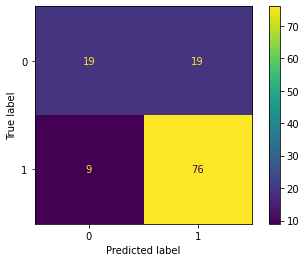

In [196]:

plot_confusion_matrix(final_model,X_test,y_test)


##### True Negative(Actual 0 predicted 0)
> actually 18 applicants loan is  not sanctioned we predicted not senctioned 
* this is good
#####  False Negative (Actual 0 predicted 1)
> actually 20 applicants loan is  not sanctioned we predicted sanctioned 
* this should be our concern 
beacuase as bank will not want to give loan to applicants who don't deserve 

##### False Positive (Actual 1 predicted 0)
> actually 2 applicants loan is sanctioned we predicted not sanctioned  
* this is applicant's loss
##### True Positive (Actual 1 predicted 1)
> actually 83 applicants loan is sanctioned and we predicted sanctined
* Good
  

# Final Model Classification Report

In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.50      0.58        38
           1       0.80      0.89      0.84        85

    accuracy                           0.77       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.76      0.77      0.76       123



In [198]:
to_view=pd.DataFrame({'Real_Values':y_test, 'Predicted_Values':y_pred})
to_view

,Real_Values,Predicted_Values
341,0,1
349,1,1
152,0,1
268,0,1
257,0,1
...,...,...
480,1,1
94,1,1
358,0,0
607,1,1


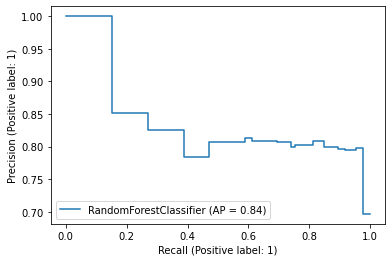

In [201]:
plot_precision_recall_curve(final_model,X_test,y_test)

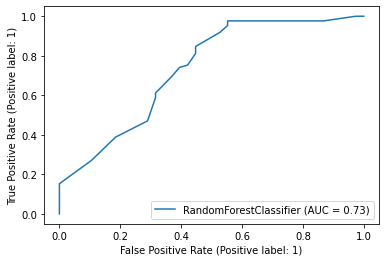

In [202]:
plot_roc_curve(final_model,X_test,y_test)

*  81% of the time model will be able to correctly predict loan Status approved as approved and rejected as rejected.

## Precision Recall Study

In [203]:
conf=confusion_matrix(y_test,y_pred)


In [204]:

TP = conf[1][1]
TN = conf[0][0]
FP = conf[0][1]
FN = conf[1][0]

In [205]:
print('Accuracy is = ',(TP + TN) / (TP + TN + FP + FN))
print('\n')
print('Recall/True +ve Rate',TP / (TP + FN))
print('\n')
print('Precision/ Positive Prediction Value', TP / (TP + FP))
print('\n')
print('FPR',(FP/(FP+TN)))
print('\n')
print('FNR',(FN/(FN+TP)))

Accuracy is =  0.7723577235772358


Recall/True +ve Rate 0.8941176470588236


Precision/ Positive Prediction Value 0.8


FPR 0.5


FNR 0.10588235294117647


In [206]:
f1_score=2*((0.8058*0.9764)/(0.8058+0.9764))
f1_score

0.8829347099091011

>**Precision**
* out of all applicants that the model predicted would get loan approved only **80.58%** actually did
>**Recall**
* out of all applicants that actually did get loan approved, the model only predicted this outcome correctly for **97.64%** of those applicants
>**F1 Score**
* here f1 score = **88%**
* thus model did great job of predicting whether or not applicants get loan approved

In [207]:
final_model.fit(X_train, y_train)

yhat = final_model.predict_proba(X_test )

#yhat

yhat = yhat[:, 1]#probability for positive outcome only.
yhat

array([0.88, 0.68, 0.76, 0.72, 0.84, 1.  , 0.2 , 0.28, 0.72, 0.88, 0.72,
       0.92, 0.88, 0.2 , 0.48, 1.  , 0.84, 0.92, 0.44, 0.68, 0.32, 0.28,
       0.64, 0.56, 0.72, 0.96, 0.76, 0.92, 0.8 , 0.76, 1.  , 0.76, 0.76,
       1.  , 0.64, 0.76, 0.64, 0.36, 0.88, 0.84, 0.68, 0.8 , 0.88, 0.16,
       0.2 , 0.32, 0.92, 0.56, 0.08, 0.24, 0.56, 0.84, 0.64, 0.64, 0.88,
       0.36, 0.88, 0.52, 0.76, 1.  , 0.52, 0.96, 0.8 , 0.72, 0.48, 0.88,
       0.16, 1.  , 0.92, 0.68, 0.68, 0.56, 0.72, 0.8 , 0.88, 0.2 , 0.56,
       0.76, 0.84, 0.92, 0.96, 0.88, 0.2 , 0.24, 0.48, 0.72, 0.8 , 0.96,
       0.84, 0.92, 0.88, 0.76, 0.68, 0.08, 0.8 , 1.  , 0.88, 0.84, 0.84,
       0.04, 0.52, 0.96, 0.96, 0.28, 0.92, 0.68, 0.76, 0.68, 0.92, 1.  ,
       0.2 , 0.8 , 0.8 , 0.48, 0.96, 0.88, 0.88, 0.16, 0.72, 0.76, 0.12,
       0.76, 0.84])

In [209]:
from sklearn.metrics import roc_curve
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, yhat)
Jt = tpr - fpr
ix = argmax(Jt)
best_threshold = thresholds[ix]
print('Best Threshold=%f' % (best_threshold))

Best Threshold=0.440000


#### Best Threshold for this model is 0.692603

In [211]:
threshold=0.44
y_pred_thresh=np.where(final_model.predict_proba(X_test)[:,1] > threshold, 1, 0) #

In [212]:
matrics=confusion_matrix(y_test,y_pred_thresh)
matrics

array([[19, 19],
       [ 4, 81]], dtype=int64)

* by applying threshold we are reduced Type 1 Error 
 i.e. false positive outcomes
* model predicted loan approved for actual loan rejected applicants this will be lose of bank so apply threshold so that model will predict loan rejected for some of them and type 1 error will reduced
Model Predicted out of 123 Applicants 103 Applicants Loan will be approved But Actually 75 applicants Loan is Approved
So When Threshold is 0.5 Model Predicted  26 Applicants Loan is Approved For Actually Rejected  Applicants . This is Type 1 Error And lose of Bank.
 Found Best threshold as 0.69 so that model will predict loan rejected for some of them and type 1 error will reduced
!

In [213]:
TP_= matrics[1][1]
TN_= matrics[0][0]
FP_= matrics[0][1]
FN_= matrics[1][0]

print('Accuracy is = ',((TP_ + TN_) / (TP_ + TN_ + FP_ + FN_)))
print('\n')
print('Recall/True +ve Rate',(TP_ / (TP_ + FN_)))
print('\n')
print('Specificity/True -ve Rate',(TN_ / (FP_ + TN_)))
print('\n')
print('Precision/ Positive Prediction Value', (TP_ / (TP_ + FP_)))
print('\n')
print('FPR',(FP_/(FP_+TN_)))
print('\n')
print('FNR',(FN_/(FN_+TP_)))

In [214]:
f1_score=2*((0.8620*0.8352)/(0.8620+0.8823))
f1_score

0.8254800206386516

# Applying Final Model on Predection Data

In [215]:
df_new = pd.read_csv('test.csv')

In [216]:
len(df_new)

367

In [217]:
df_new.shape

(367, 12)

In [218]:
df_new.duplicated().sum()

0

In [219]:
df_new.isna().sum()

Loan_ID                0
Sex                   11
Marital_Status         0
No_Dependents         10
Education_Status       0
Self_Employed         23
Income                 0
Coapplicant_Income     0
Loan_Amount            5
Tenure                 6
Credit_History        29
Property_Area          0
dtype: int64

In [220]:
#Fill NaN Values on Categorical Data
df_new[['Loan_Amount','Tenure']]=df_new[['Loan_Amount','Tenure',]].fillna(df_new[['Loan_Amount','Tenure']].mean())


In [221]:
df_new=df_new.fillna(df.mode().iloc[0])

In [222]:
df_new['TOT_INC']=(df_new['Income']+df_new['Coapplicant_Income'])
df_new['Loan_Amount']=df_new['Loan_Amount']*1000

In [223]:

df_new['EMI']= df_new.apply(lambda x: E_M_I(x.Loan_Amount,x.Tenure,r), axis = 1)
df_new['Balance']=df_new['TOT_INC']-df_new['EMI']

In [224]:
df_new['Balance']=df_new['Balance'].astype(int)
df_new['EMI']=df_new['EMI'].astype(int)

In [225]:
df_new=df_new[['Sex','Marital_Status','No_Dependents','Education_Status','Self_Employed','Property_Area','TOT_INC','Loan_Amount','Credit_History','Tenure','EMI','Balance']]

In [226]:
df_new['Sex'].replace({'Male':1,'Female':0},inplace=True)
df_new['Marital_Status'].replace({'Yes':1,'No':0},inplace=True)
df_new['No_Dependents'].replace({'0':0,'1':1,'2':2,'3+':4},inplace=True)
df_new['Education_Status'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df_new['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df_new['Property_Area'].replace({'Semiurban':2,'Urban':1,'Rural':0},inplace=True)

In [227]:
df_new.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance
0,1.0,1,0.0,1,0.0,1,5720,110000.0,1.0,360.0,965,4754
1,1.0,1,1.0,1,0.0,1,4576,126000.0,1.0,360.0,1105,3470
2,1.0,1,2.0,1,0.0,1,6800,208000.0,1.0,360.0,1825,4974
3,1.0,1,2.0,1,0.0,1,4886,100000.0,1.0,360.0,877,4008
4,1.0,0,0.0,0,0.0,1,3276,78000.0,1.0,360.0,684,2591


In [228]:
df.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance,Loan_Status
0,1,0,0,1,0,1,5849.0,146412.162162,1.0,360.0,1284,4564,1
1,1,1,1,1,0,0,6091.0,128000.000000,1.0,360.0,1123,4967,0
2,1,1,0,1,1,1,3000.0,66000.000000,1.0,360.0,579,2420,1
3,1,1,0,0,0,1,4941.0,120000.000000,1.0,360.0,1053,3887,1
4,1,0,0,1,0,1,6000.0,141000.000000,1.0,360.0,1237,4762,1


In [229]:
X_new = scaler.fit_transform(df_new)

In [230]:
final_predict=final_model.predict(X_new)
final_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

## Applying Threshold on Logistic Model

In [231]:


yhat = final_model.predict_proba(X_new)

#yhat

yhat_final = yhat[:, 1]#probability for positive outcome only.
yhat_final

array([0.72, 0.8 , 0.76, 0.8 , 0.52, 0.6 , 0.64, 0.16, 0.96, 0.96, 0.64,
       0.6 , 0.8 , 0.44, 0.88, 0.84, 0.8 , 0.72, 0.44, 0.88, 0.72, 0.64,
       0.96, 0.92, 0.8 , 0.08, 0.68, 0.72, 0.92, 0.92, 0.88, 0.8 , 0.76,
       0.8 , 0.92, 0.32, 0.88, 0.76, 0.92, 0.8 , 0.6 , 0.84, 0.92, 0.72,
       0.76, 0.84, 0.28, 0.92, 0.64, 0.76, 0.88, 0.4 , 0.48, 0.8 , 0.84,
       0.2 , 0.84, 0.84, 0.28, 0.88, 0.96, 0.84, 0.88, 0.24, 0.44, 0.68,
       0.16, 0.16, 0.8 , 0.04, 0.96, 0.96, 0.68, 0.8 , 0.72, 0.72, 0.68,
       0.8 , 0.48, 0.6 , 0.44, 0.72, 0.16, 0.72, 0.2 , 0.88, 1.  , 0.68,
       0.84, 0.76, 0.84, 0.6 , 0.8 , 0.96, 0.12, 0.96, 0.76, 0.68, 0.72,
       0.84, 0.88, 0.12, 0.92, 0.6 , 0.84, 0.84, 0.12, 0.8 , 0.96, 0.52,
       0.84, 0.96, 0.84, 0.96, 0.84, 0.84, 0.32, 0.08, 0.16, 0.16, 0.64,
       0.68, 0.64, 0.12, 0.16, 0.96, 0.32, 0.76, 0.84, 0.92, 0.84, 0.56,
       0.64, 0.76, 0.8 , 0.96, 0.64, 0.76, 0.84, 0.84, 0.44, 0.8 , 0.32,
       0.6 , 0.68, 0.8 , 0.88, 0.2 , 0.72, 0.88, 0.

In [238]:
def thre(b):
    if b>0.44:
        return(1)
    else:
        return(0)

In [239]:
df_new['final_predict']=final_predict.tolist()
df_new['yhat_f']=yhat_final.tolist()

In [240]:
df_new['thresh']= df_new.apply(lambda x: thre(x.yhat_f), axis = 1)


In [241]:
thresh=np.array(df_new['thresh'])

In [242]:
df_new['final_predict'].value_counts()

1    283
0     84
Name: final_predict, dtype: int64

In [243]:
df_new['thresh'].value_counts()

1    288
0     79
Name: thresh, dtype: int64

In [244]:
confusion_matrix(final_predict,thresh)

array([[ 79,   5],
       [  0, 283]], dtype=int64)

after applying threshold 34 applicants loan will be rejected

Out of 367 Applicants 

>By Default Threshold  
* 59 Applicants Loan will be Rejected
* 308 Applicants Loan Will Be Approved

> But If we apply threshold as 0.69 
* 93 Applicants Loan will be Rejected
* 274 Applicants Loan Will Be Approved

In [245]:
len(yhat)

367

In [246]:
len(final_predict)

367

In [247]:
df_new.columns

Index(['Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Property_Area', 'TOT_INC', 'Loan_Amount',
       'Credit_History', 'Tenure', 'EMI', 'Balance', 'final_predict', 'yhat_f',
       'thresh'],
      dtype='object')

In [248]:
df_new1=df_new.drop(['TOT_INC', 'Loan_Amount','Tenure', 'EMI','final_predict', 'yhat_f'],axis=1)

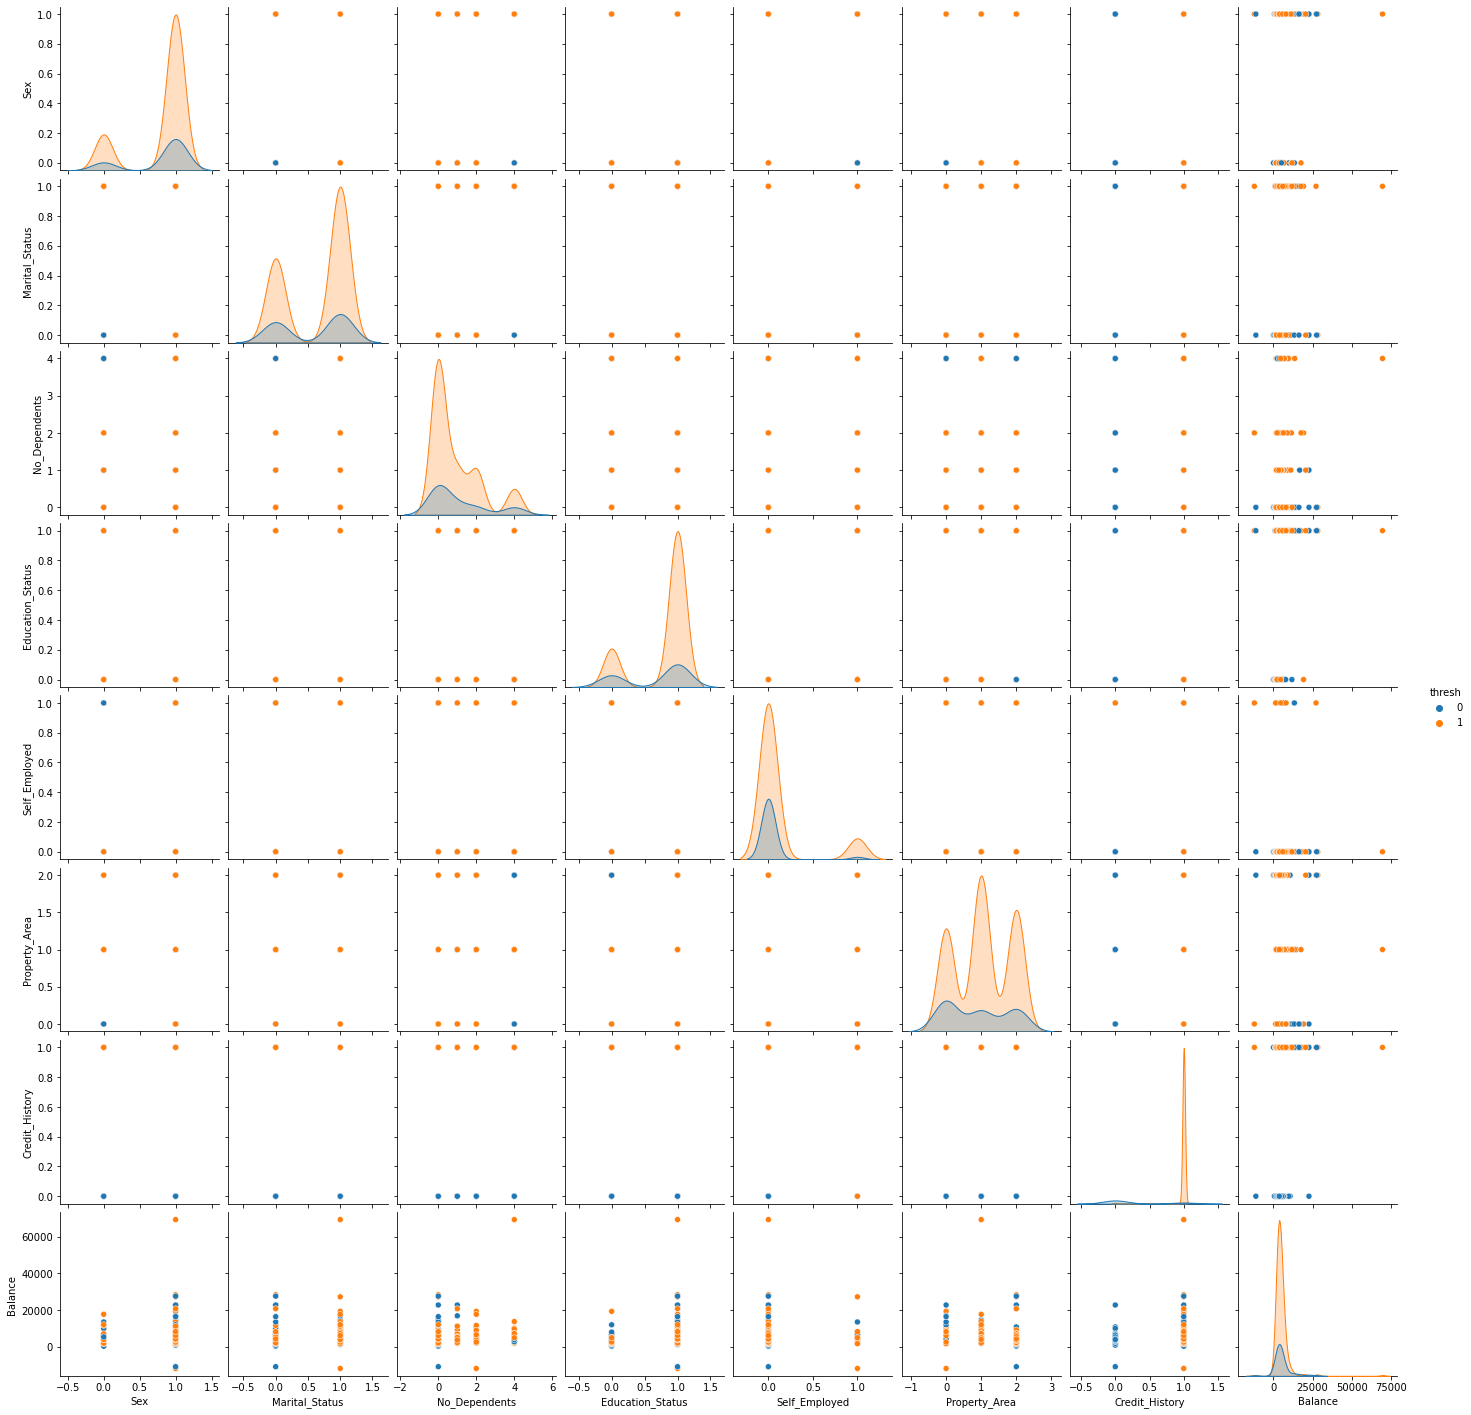

In [249]:
sns.pairplot(df_new1,hue='thresh')

<AxesSubplot:>

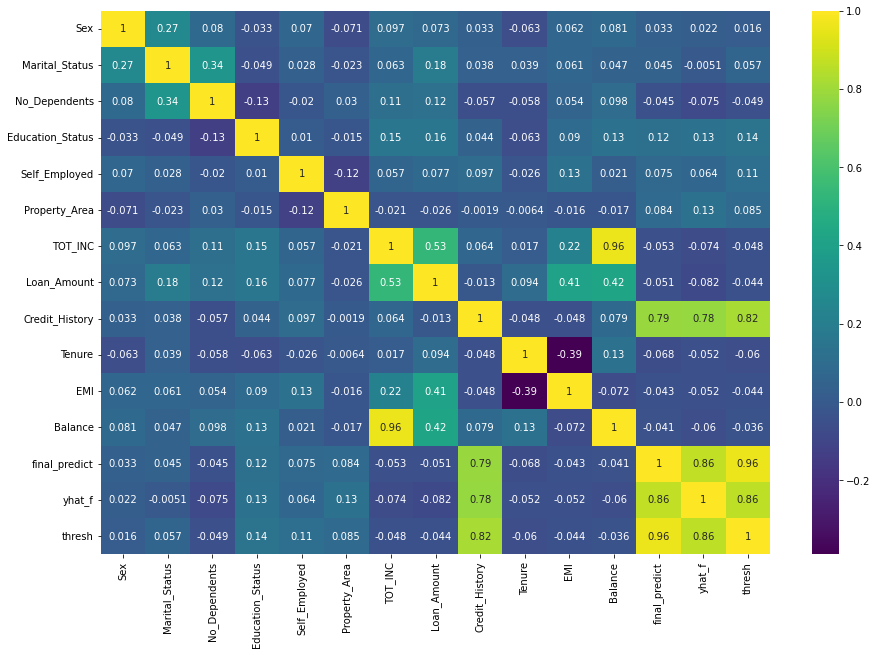

In [250]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),cmap='viridis',annot=True)

* threshold is highly correleted with credit history greater the credit history greater the thresh and obviously loan approval chances are more

In [251]:
len(df_new[(df_new['final_predict']==1) & (df_new['thresh']==0)])


0

In [252]:
Rejected_Applicants=df_new[(df_new['final_predict']==1) & (df_new['thresh']!=1)]
Rejected_Applicants

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance,final_predict,yhat_f,thresh


In [253]:
len(Rejected_Applicants)


0

In [254]:
Rejected_Applicants['Marital_Status'].value_counts()

Series([], Name: Marital_Status, dtype: int64)

In [255]:
29/40

0.725

* Not married aaplicants have 72.5%chances of getting loan rejected

In [256]:
Rejected_Applicants['Sex'].value_counts()

Series([], Name: Sex, dtype: int64)

In [257]:
Rejected_Applicants['No_Dependents'].value_counts()

Series([], Name: No_Dependents, dtype: int64)

In [258]:
27/40

0.675

* applicants with 0 dependents have 67.5% chances of loan rejection

In [259]:
len(Rejected_Applicants[(Rejected_Applicants['Marital_Status']=='Yes') & (Rejected_Applicants['Sex']=='Male')])


0

## Creating Excel File With Loan ID and Loan_Status using Threshold

In [260]:
df_final = pd.read_csv('test.csv')

In [261]:
df_final['0.5_Threshold_Model']=final_predict.tolist()
df_final['yhat_f']=yhat_final.tolist()
df_final['0.69_Threshold_Model']= df_new.apply(lambda x: thre(x.yhat_f), axis = 1)


In [262]:
df_final['0.5_Threshold_Model'].replace({1:'Yes',0:'No'},inplace=True)
df_final['0.69_Threshold_Model'].replace({1:'Yes',0:'No'},inplace=True)

In [263]:
df_predicted=df_final[['Loan_ID','0.5_Threshold_Model','yhat_f','0.69_Threshold_Model']]

In [264]:
df_predicted.head()

,Loan_ID,0.5_Threshold_Model,yhat_f,0.69_Threshold_Model
0,LP001015,Yes,0.72,Yes
1,LP001022,Yes,0.80,Yes
2,LP001031,Yes,0.76,Yes
3,LP001035,Yes,0.80,Yes
4,LP001051,Yes,0.52,Yes


In [265]:
df_predicted.to_excel('predection_model_based_on_0.40_threshold.xlsx') #excel 